In [79]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *

import sklearn.metrics
import datetime
torch.cuda.set_device(2)

import fastai

In [80]:
fastai.__version__

'1.0.22'

In [47]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels')
LM_DATA_PATH = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmdata/')

In [81]:
# Language model data
data_clas_train = pd.read_csv(LM_DATA_PATH/'train.csv')
data_clas_val = pd.read_csv(LM_DATA_PATH/'val.csv')

data_lm = TextLMDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, backwards=False)

In [100]:
data_lm.save()

In [101]:
!ls {EX_PA}

2018_11_10_14_12_50  2018_11_10_15_20_41_558367  history  models  tmp


In [4]:
# data_lm = TextLMDataBunch.load(EX_PA)

In [68]:
data_lm.valid_dl

In [13]:
download_wt103_model()

In [73]:
data_lm.valid_dl

DeviceDataLoader(dl=<fastai.text.data.LanguageModelLoader object at 0x7f47a7f43518>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x7f47d17d49d8>, skip_size1=False)

In [97]:
learn = language_model_learner(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.5)

In [38]:
exp_id = datetime.datetime.now().strftime("%Y_%_m_%d_%H_%M_%S_%f")

In [39]:
exp_id

'2018_11_10_16_10_04_906710'

In [40]:
Path(EX_PA/'models'/exp_id).mkdir(parents=True, exist_ok=True)

In [24]:
# ! ls {EX_PA/'models'}

In [75]:
learn.callbacks += [
    SaveModelCallback(learn, name=exp_id),
    CSVLogger(learn, 'history/' + exp_id ),
    EarlyStoppingCallback(learn, patience=5)
    ]

In [11]:
!ls /mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels

2018_11_10_14_12_50  2018_11_10_15_20_41_558367  history  models  tmp


In [45]:
data_lm.valid_dl

In [98]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


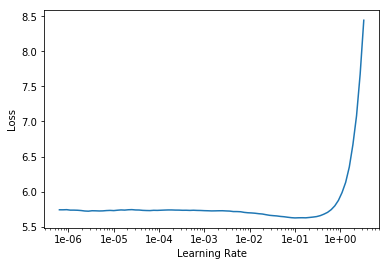

In [99]:
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(1, 1e-1)

Total time: 00:00
epoch  train_loss  valid_loss  accuracy
1      4.454222    3.537749    0.246142  (00:00)



In [77]:
learn.recorder.val_losses[-1:][0]

3.5377488

In [85]:
learn.recorder.val_losses

[3.5377488]

In [86]:
learn.recorder.metrics

[[tensor(0.2461)]]

In [87]:
learn.recorder.losses

[tensor(4.4542, device='cuda:2')]

In [89]:
[x.item() for x in learn.recorder.losses]

[4.454221725463867]

In [92]:
[x.item() for x in [y for y in learn.recorder.metrics]]

AttributeError: 'list' object has no attribute 'item'

In [93]:
res = []
for x in learn.recorder.metrics:
    res_inner = []
    for y in x:
        res_inner.append(y.item())
    res.append(res_inner)

In [94]:
res

[[0.2461419701576233]]

In [96]:
learn.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(299, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(299, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=299, bias=True)
    (output_dp): RNNDropout()
  )
)

In [104]:
learn.recorder.

Recorder(learn=LanguageLearner(data=<fastai.text.data.TextLMDataBunch object at 0x7f455fe23940>, model=SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(42539, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(42539, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=42539, bias=True)
    (output_dp): RNNDropout()
  )
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=<function cross_entropy at 0x7f47d19e82f0>, metrics=[<function accuracy at 0x7f47cafa6268>], true_wd=True, bn_wd=True, wd=0.01,

In [7]:
[0.1 / (2 * (4 - x)) for x in range(4)]

[0.0125, 0.016666666666666666, 0.025, 0.05]